# Задание
1. https://docs.opencv.org/3.4/d1/d32/tutorial_py_contour_properties.html

2. https://docs.opencv.org/3.4/d5/d45/tutorial_py_contours_more_functions.html

3. https://docs.opencv.org/3.4/d4/dc6/tutorial_py_template_matching.html

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [15]:
img = cv.imread('resources/lab4/image.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]

In [10]:
x,y,w,h = cv.boundingRect(cnt)
aspect_ratio = float(w)/h

area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area

area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area

area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)

(x,y),(MA,ma),angle = cv.fitEllipse(cnt)

mask = np.zeros(img.shape,np.uint8)
cv.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
# pixelpoints = cv.findNonZero(mask)

print (aspect_ratio)
print (extent)
print (solidity)
print (equi_diameter)
print (pixelpoints)



0.8986486486486487
0.33788864052021944
0.6059860598605986
92.02345468430083
[[  7  69]
 [  7  72]
 [  7  73]
 ...
 [153  81]
 [154  79]
 [154  80]]


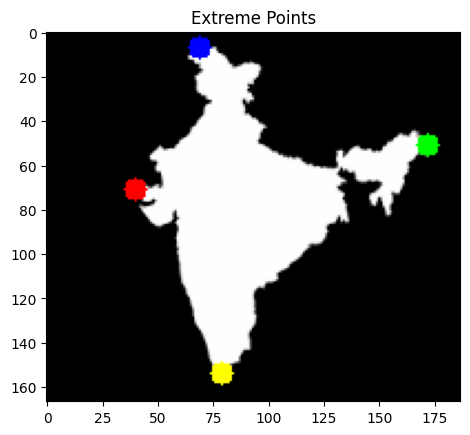

In [18]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Чтение изображения
# img = cv.imread('image.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Применение пороговой обработки и нахождение контуров
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]

# Вычисление крайних точек
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

# Отображение крайних точек на изображении
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)  # Конвертируем в цветное изображение
cv.circle(img_color, leftmost, 5, (0, 0, 255), -1)  # Левый край
cv.circle(img_color, rightmost, 5, (0, 255, 0), -1)  # Правый край
cv.circle(img_color, topmost, 5, (255, 0, 0), -1)  # Верхний край
cv.circle(img_color, bottommost, 5, (0, 255, 255), -1)  # Нижний край

# Отображение изображения
plt.imshow(cv.cvtColor(img_color, cv.COLOR_BGR2RGB))
plt.title('Extreme Points')
plt.show()


In [19]:
img = cv.imread('resources/lab4/ppg.png', cv.IMREAD_GRAYSCALE)
# img = cv.imread('images_flower.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,155,255,cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(thresh1, 1, 2)
cnt = contours[0]



In [20]:
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)

In [21]:
img = cv.imread('resources/lab4/ppg.png')
assert img is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours[0]
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(img,start,end,[0,255,0],2)
    cv.circle(img,far,5,[0,0,255],-1)
cv.imshow('img',img)
cv.waitKey(0)
cv.destroyAllWindows()

In [22]:
import cv2 as cv
import numpy as np
img1 = cv.imread('resources/lab4/ppg.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('resources/lab4/ppg2.png', cv.IMREAD_GRAYSCALE)
img3 = cv.imread('resources/lab4/ppg3.png', cv.IMREAD_GRAYSCALE)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
ret, thresh3 = cv.threshold(img3, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]
contours,hierarchy = cv.findContours(thresh3,2,1)
cnt3 = contours[0]
ret3 = cv.matchShapes(cnt1,cnt1,1,0.0)
print(ret3)
ret = cv.matchShapes(cnt1,cnt2,1,0.0)
print( ret )
ret2 = cv.matchShapes(cnt1,cnt3,1,0.0)
print( ret2 )

0.0
1.0835776720341528e-13
0.41940041948727447


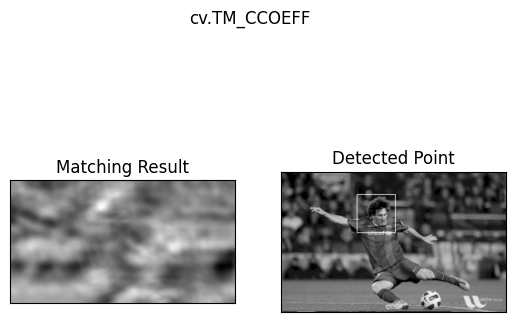

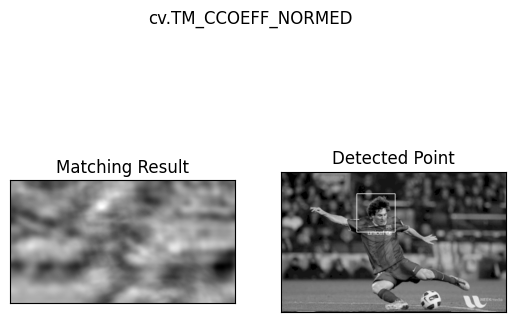

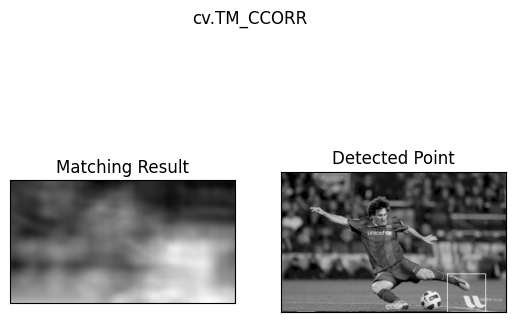

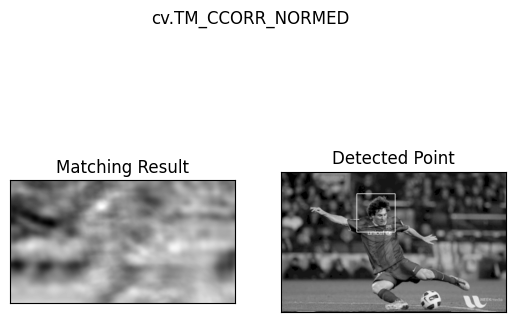

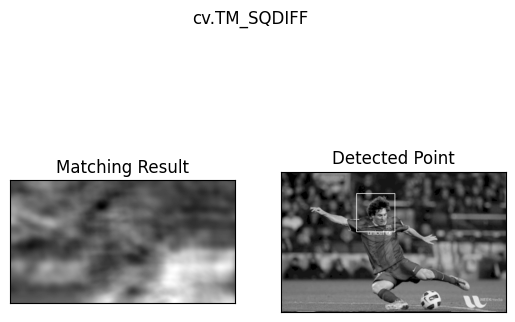

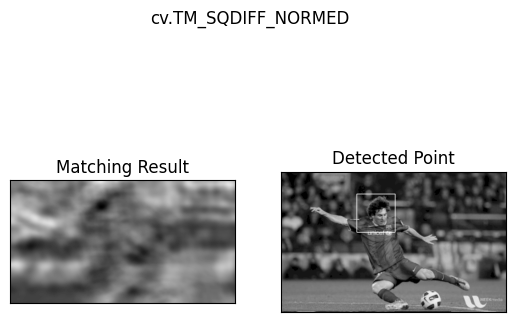

In [26]:

img = cv.imread('resources/lab4/messi5.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('resources/lab4/template.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [32]:
img_rgb = cv.imread('resources/lab4/game2.png')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('resources/lab4/coin2.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv.imwrite('resources/lab4/res.png',img_rgb)

True